# Project: Cancer Mortality in the US

In this project I analyze the cancer dataset (https://data.world/nrippner/ols-regression-challenge) with the goal to predict the cancer mortality rate as mean death rate per capita in the U.S. using Generalized Linear Regression. The dataset has 34 columns with 'TARGET_deathRate' being the the variable we would like to perform regression on using the other 33 features and 3,047 instances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline


# Get the features & target variables
raw_data = pd.read_excel('cancer_reg.xlsx', na_values='NaN')
y = raw_data[['TARGET_deathRate']]
X = raw_data.drop('TARGET_deathRate', 'columns')

# Split the data into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Load the data
raw_data = X_train
raw_data['deathRate'] = y_train

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [2]:
# See the first 5 rows
raw_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
538,93.000000,42,420.000000,32744,13445,22.0,0.0,"[22640, 34218.1]",48.1,45.9,...,28.9,49.3,26.6,96.965875,1.201780,0.215134,0.400593,55.217156,4.812157,184.1
1295,1962.667684,6,453.549422,45341,2591,12.0,0.0,"(45201, 48021.6]",49.8,49.0,...,37.2,38.8,12.8,91.901273,3.085229,1.195526,0.000000,53.288926,10.810811,134.0
1127,155.000000,65,434.300000,45158,26224,13.1,0.0,"(42724.4, 45201]",44.4,42.9,...,41.4,42.7,21.4,94.327017,2.347701,0.441609,0.362346,49.779647,4.951691,174.0
2840,309.000000,152,409.000000,34354,56486,24.6,0.0,"(34218.1, 37413.8]",43.6,42.4,...,34.8,42.9,22.8,96.684287,1.283785,0.338947,0.091323,50.552440,3.668414,193.2
1090,20.000000,7,307.100000,57242,4691,9.6,0.0,"(54545.6, 61494.5]",52.9,51.2,...,31.7,35.0,13.9,97.729258,0.000000,0.829694,0.000000,56.868687,2.292994,106.1


In [3]:
# Get a snapshot for summary statistics
raw_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
count,2132.000000,2132.000000,2132.000000,2132.000000,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,597.885621,182.821295,448.400079,47056.307223,1.006896e+05,16.844278,159.434147,45.708255,39.556191,42.130394,...,41.249156,36.233021,19.192636,83.684369,8.925588,1.247173,2.046204,51.311920,5.639744,178.707458
std,1275.296915,449.899806,55.182698,11764.169112,2.811766e+05,6.291936,552.034466,47.583227,5.247479,5.331173,...,9.389506,7.691048,5.966257,16.260348,14.259865,2.616385,3.632721,6.469965,1.990063,27.412313
min,7.000000,3.000000,201.300000,22640.000000,8.290000e+02,3.900000,0.000000,22.300000,22.400000,22.300000,...,14.300000,11.200000,2.600000,11.008762,0.000000,0.000000,0.000000,23.885628,0.000000,66.300000
25%,74.000000,28.000000,420.900000,39078.750000,1.166400e+04,12.200000,0.000000,37.775000,36.400000,39.100000,...,34.500000,30.800000,14.900000,77.044238,0.620624,0.247437,0.296332,47.825737,4.538801,161.700000
50%,171.000000,61.000000,453.549422,45201.000000,2.579150e+04,15.900000,0.000000,40.900000,39.500000,42.400000,...,41.000000,36.450000,18.800000,90.053620,2.233183,0.543373,0.851921,51.686980,5.354838,178.600000
75%,529.250000,151.250000,480.900000,52535.250000,6.966075e+04,20.400000,86.797730,44.100000,42.600000,45.400000,...,47.800000,41.600000,23.000000,95.368192,10.185748,1.206212,2.243810,55.386831,6.478029,194.825000
max,24965.000000,9445.000000,1206.900000,122641.000000,5.238216e+06,47.000000,9762.308998,619.200000,64.700000,65.700000,...,68.900000,65.100000,46.600000,99.693045,85.947799,37.156932,41.930251,71.703057,21.326165,362.800000


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2132 entries, 538 to 860
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2132 non-null   float64
 1   avgDeathsPerYear         2132 non-null   int64  
 2   incidenceRate            2132 non-null   float64
 3   medIncome                2132 non-null   int64  
 4   popEst2015               2132 non-null   int64  
 5   povertyPercent           2132 non-null   float64
 6   studyPerCap              2132 non-null   float64
 7   binnedInc                2132 non-null   object 
 8   MedianAge                2132 non-null   float64
 9   MedianAgeMale            2132 non-null   float64
 10  MedianAgeFemale          2132 non-null   float64
 11  Geography                2132 non-null   object 
 12  AvgHouseholdSize         2132 non-null   float64
 13  PercentMarried           2132 non-null   float64
 14  PctNoHS18_24           

In [5]:
raw_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1593
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over           95
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     425
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [6]:
raw_data = raw_data.astype({'Geography' : 'string', 'binnedInc' : 'category'})
raw_data[['Geography','binnedInc']].dtypes

Geography      string
binnedInc    category
dtype: object

## Analyzing Missing Data

Above we can see that there are 3 columns with missing data. The analysis below is to determine weather it is appropriate to drop the columns or fill in the missing data.

In [7]:
# Isolate column names with missing values
column_names = raw_data.loc[:, raw_data.isnull().sum() != 0].columns
column_names = list(column_names)
column_names

['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']

In [8]:
# Get the amount and percent of data missing in each column with missing data
for column in column_names:
    missing_amount = raw_data[column].isna().sum()
    print("Missing data in", column)
    print("\tAmount of missing data values:", missing_amount)
    print("\tAmount of non-missing data values:", len(raw_data) - missing_amount)
    print("\tPercent of data missing {0:.2f}".format(missing_amount/len(raw_data)))

Missing data in PctSomeCol18_24
	Amount of missing data values: 1593
	Amount of non-missing data values: 539
	Percent of data missing 0.75
Missing data in PctEmployed16_Over
	Amount of missing data values: 95
	Amount of non-missing data values: 2037
	Percent of data missing 0.04
Missing data in PctPrivateCoverageAlone
	Amount of missing data values: 425
	Amount of non-missing data values: 1707
	Percent of data missing 0.20


In [9]:
# Get summary statistics for the missing columns
raw_data[column_names].describe()

,PctSomeCol18_24,PctEmployed16_Over,PctPrivateCoverageAlone
count,539.000000,2037.000000,1707.000000
mean,40.869017,54.242906,48.461394
std,11.403561,8.219479,9.950386
min,7.100000,17.600000,16.800000
25%,33.850000,48.800000,41.000000
50%,40.000000,54.400000,48.400000
75%,46.400000,60.400000,55.600000
max,79.000000,80.100000,77.100000


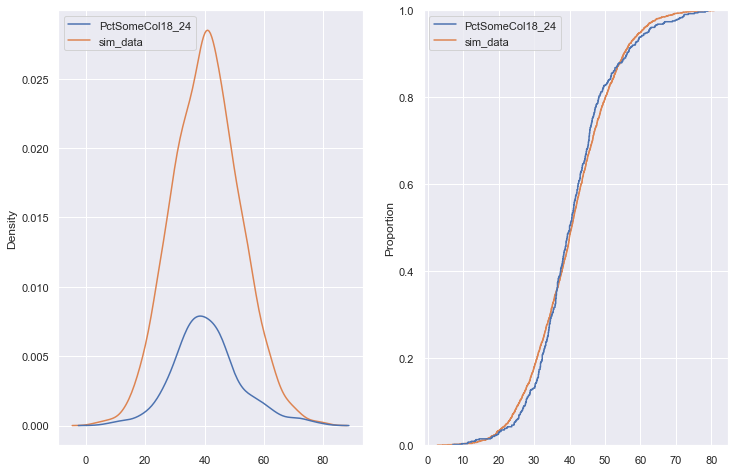

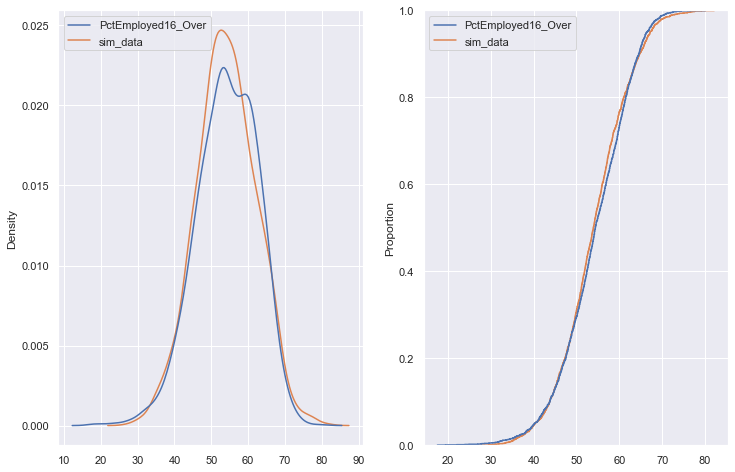

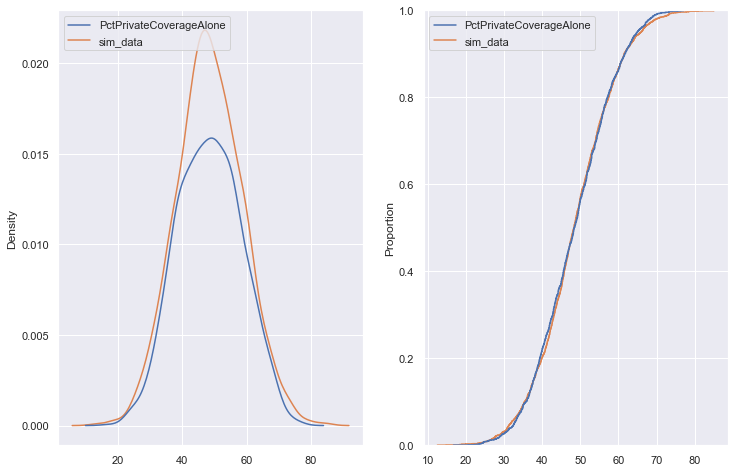

In [10]:
from numpy.random import normal

sns.set(rc={'figure.figsize':(12, 8)})
for column in column_names:
    # Created simulated data to compare to the actual observed data
    mean, std = np.mean(raw_data[column]), np.std(raw_data[column])
    simulated_data = normal(mean, std, len(raw_data[column]))
    
    # Join the observed data to the simulated data
    kde_df = raw_data[[column]].copy(deep=True)
    kde_df['sim_data'] = simulated_data.tolist()
    
    # Create the kde plot of the observed and simulated data
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    sns.kdeplot(data=kde_df, ax=ax1)
    sns.move_legend(ax1, loc=2)
    #ax1.set_xticklabels(labels="{column} KDE Plot".format(column))
    
    # Create the ECDF for the missing column
    sns.ecdfplot(kde_df, ax=ax2)
    sns.move_legend(ax2, loc=2)
    #ax2.set_xticklabels(labels="{column} ECDF Plot".format(column))
    
    # Save the plots
    #plt.savefig(column + ".png", dpi=300)

In [11]:
cancer_df = raw_data.copy(deep=True)

# Feature Analysis

Analyze scatter plots, correlations, covariances, look for interactions terms, and look for non-linear correlations.

1) Get the correlations and find the most positively and negatively correlated features.<br> 
2) Get scatter plots for these features and the target variable.<br> 
3) Determine if a no-linear relationship would be better.<br> 
3) Look for non-linear relationships in other features using scatter plots.<br> 

In [18]:
# Look at the feature (pearson) correlations with the target variable TARGET_deathRate
cancer_corr = cancer_df.corr()

In [13]:
# The top 5 correlations
print("The 5 most positively correlated features with deathRate")
pos_corr = cancer_corr.nlargest(6, 'deathRate')[['deathRate']] \
            .sort_values('deathRate', ascending=False)
pos_corr

The 5 most positively correlated features with deathRate


,deathRate
deathRate,1.000000
incidenceRate,0.450848
PctPublicCoverageAlone,0.438340
PctHS25_Over,0.420043
povertyPercent,0.409176
PctPublicCoverage,0.392617


In [14]:
# The bottom 5 correlations
print("The 5 most negatively correlated features with deathRate")
neg_corr = cancer_corr.nsmallest(5, "deathRate")[['deathRate']] \
            .sort_values('deathRate', ascending=True)
neg_corr

The 5 most negatively correlated features with deathRate


,deathRate
PctBachDeg25_Over,-0.488816
medIncome,-0.411701
PctEmployed16_Over,-0.392153
PctPrivateCoverage,-0.381505
PctPrivateCoverageAlone,-0.351975


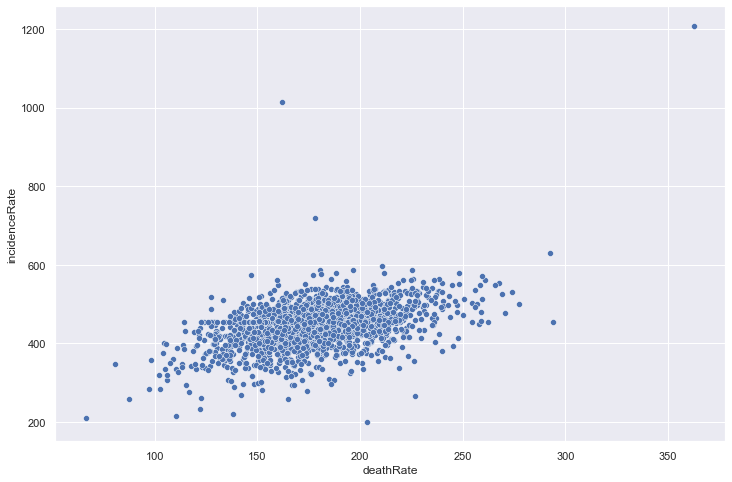

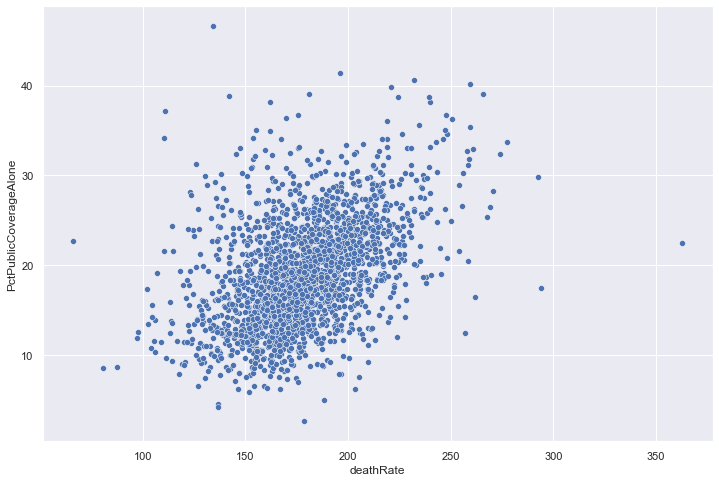

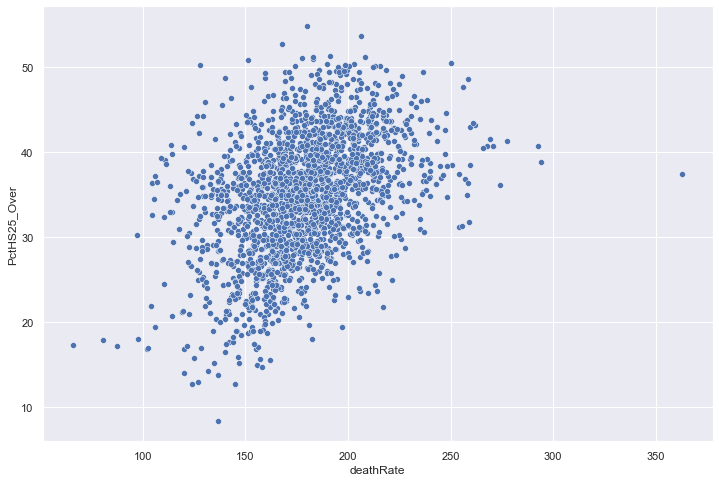

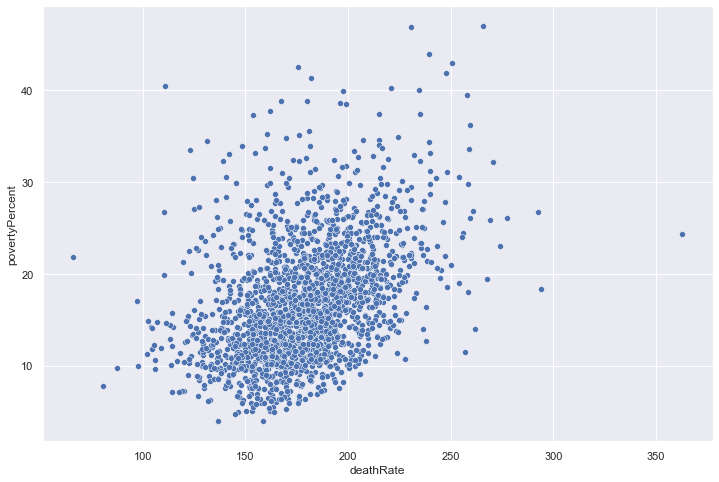

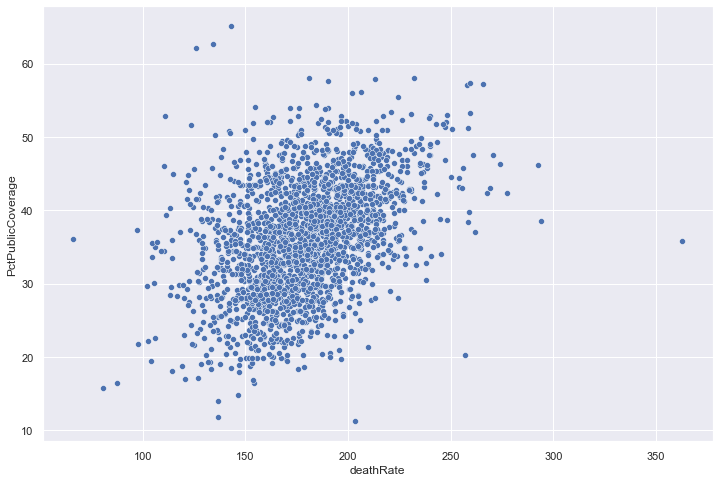

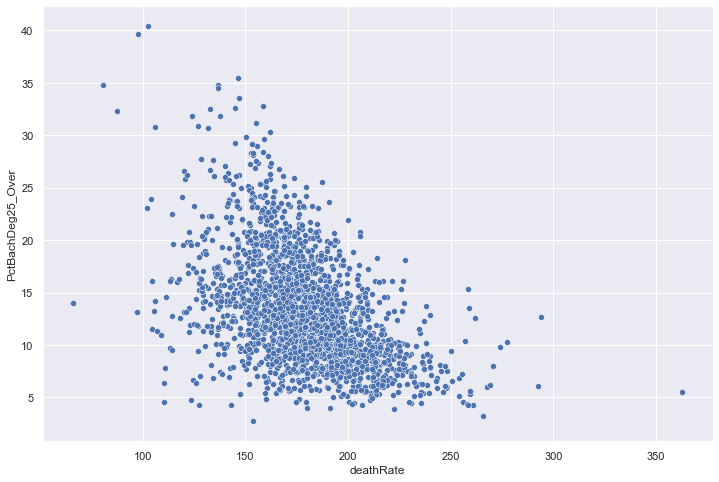

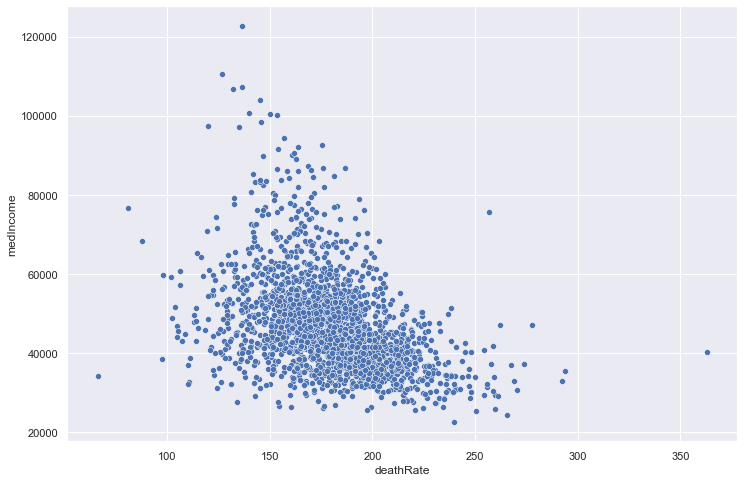

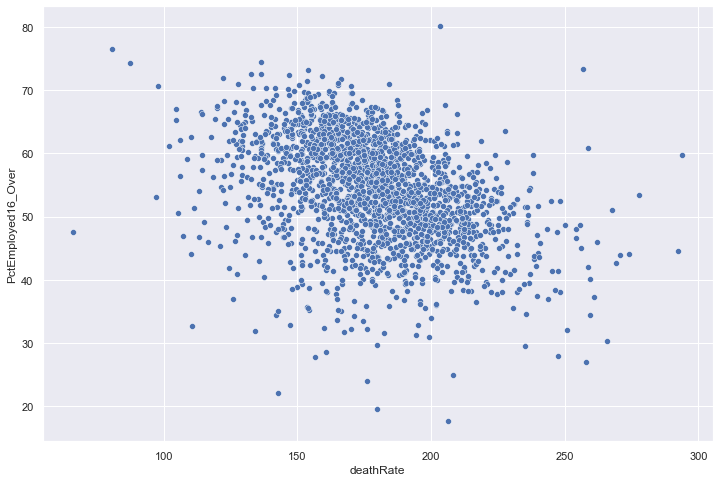

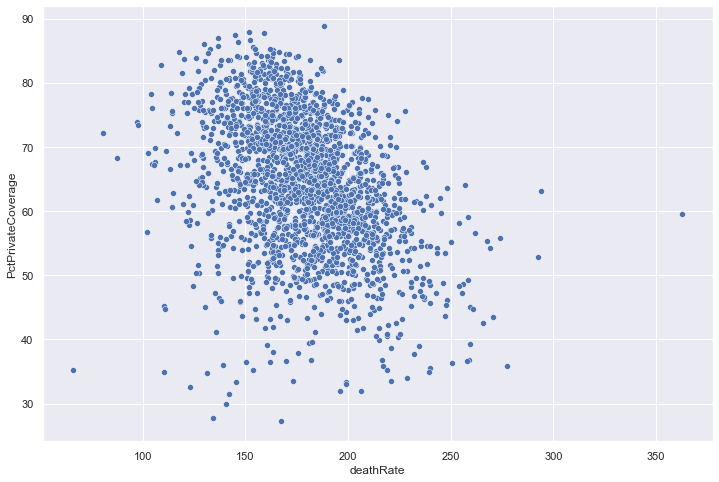

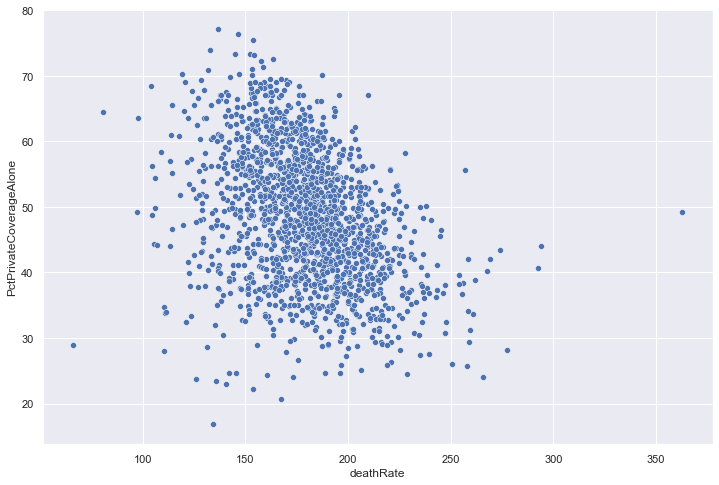

In [15]:
# Get the columns with a high correlation with the target variable
high_corr_col = list(pos_corr.index) + list(neg_corr.index)

# Generate the scatter plot for the columns with high correlation
target_col = high_corr_col[0]

# Generate scatter plots for features and the target varaible
for col in high_corr_col[1:]:
    sns.scatterplot(data=cancer_df, x=target_col, y=col)
    plt.show()




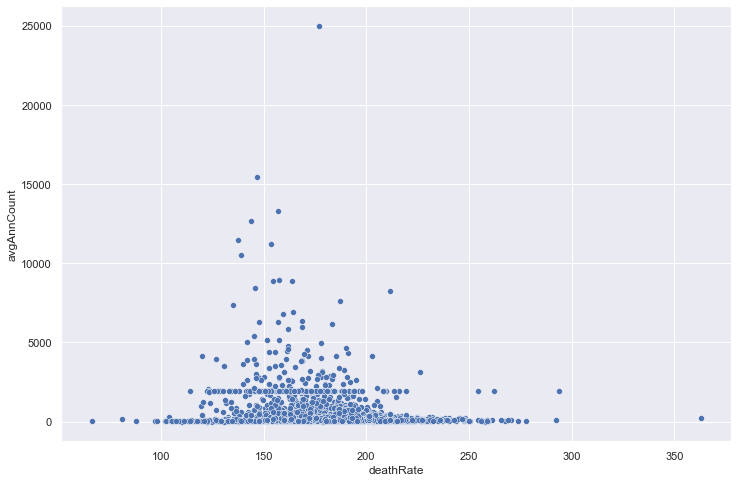

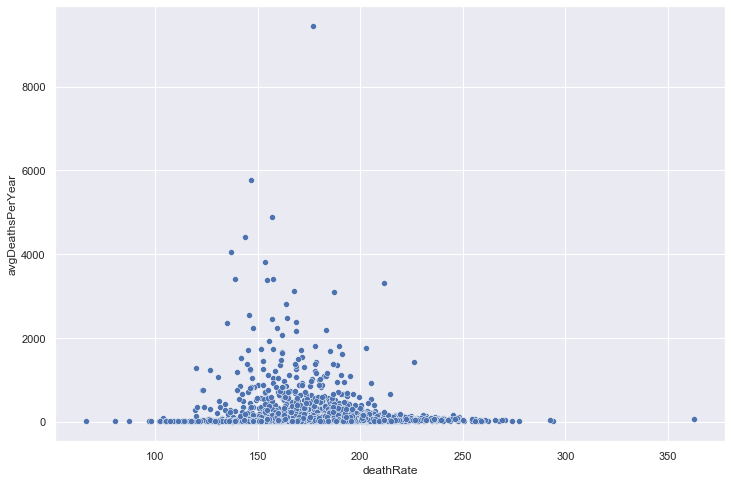

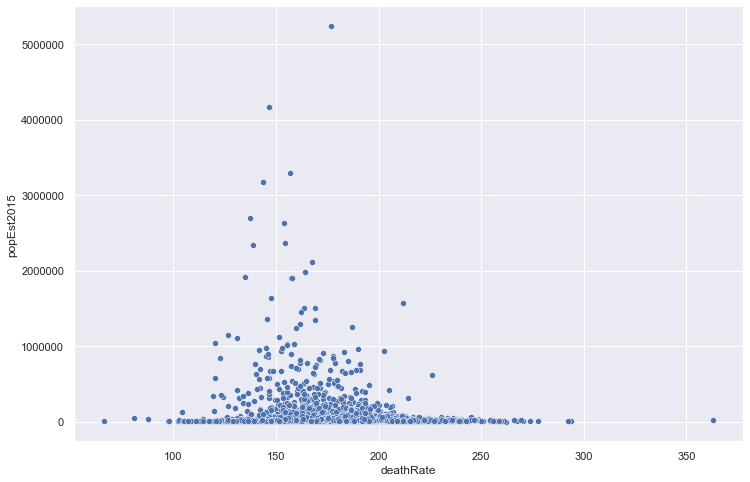

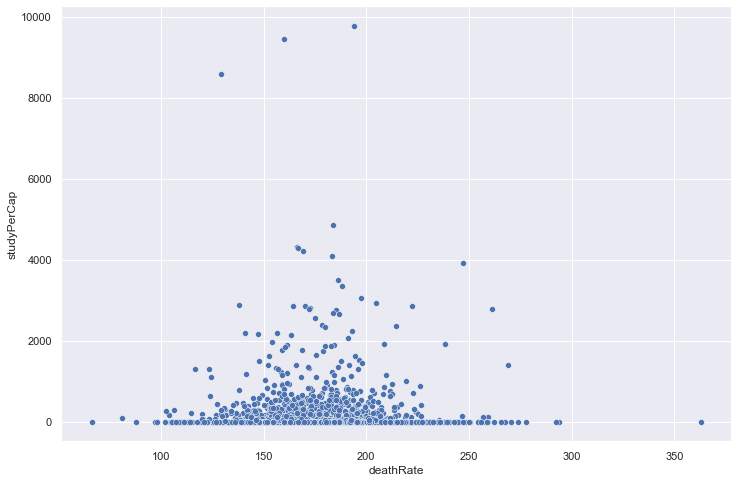

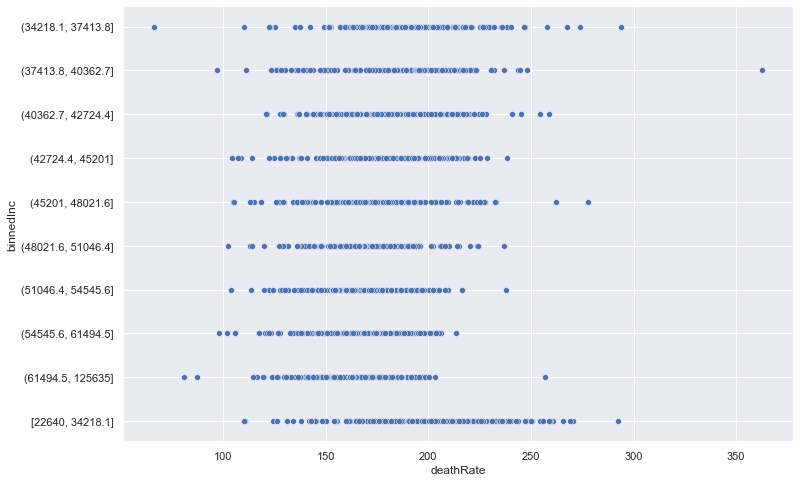

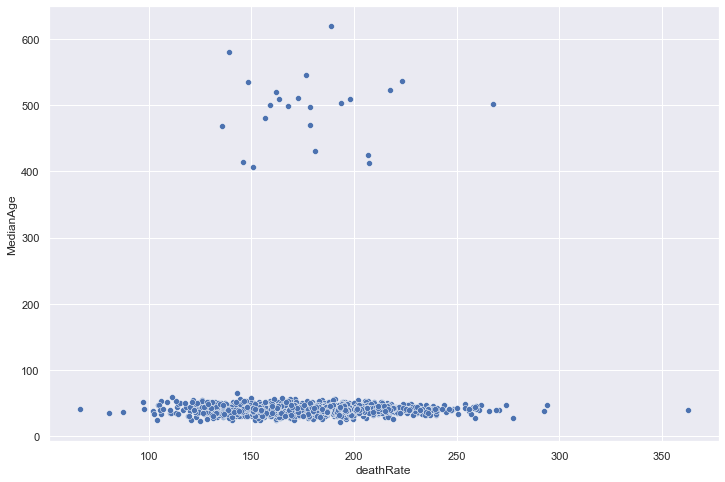

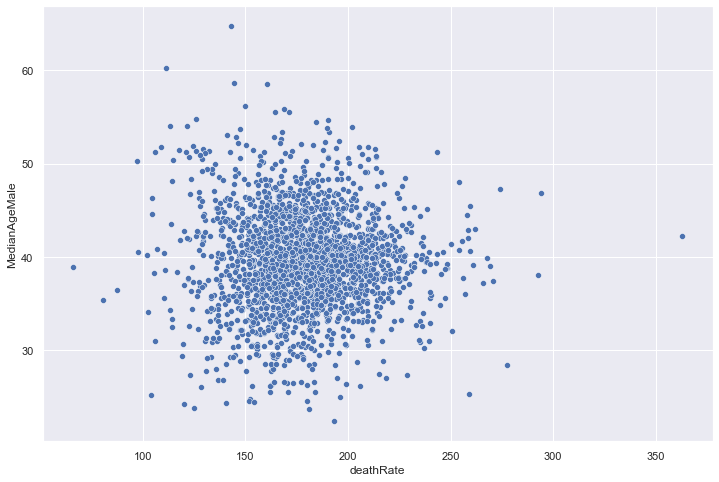

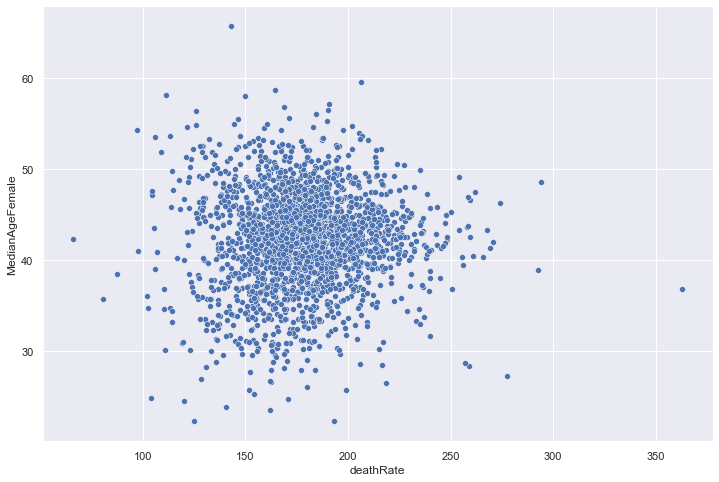

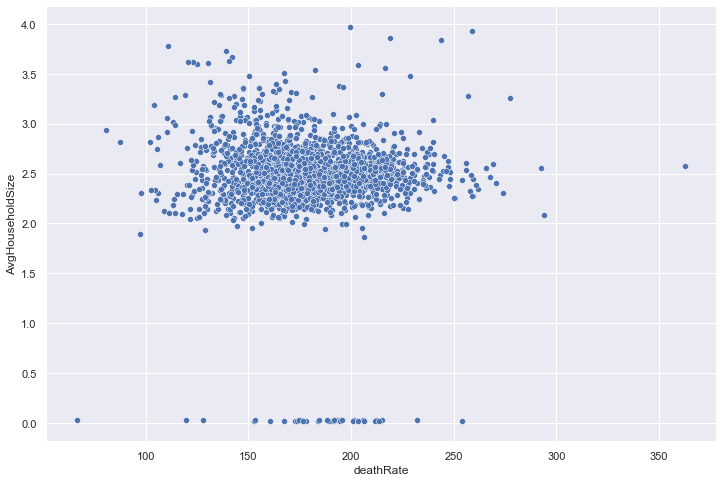

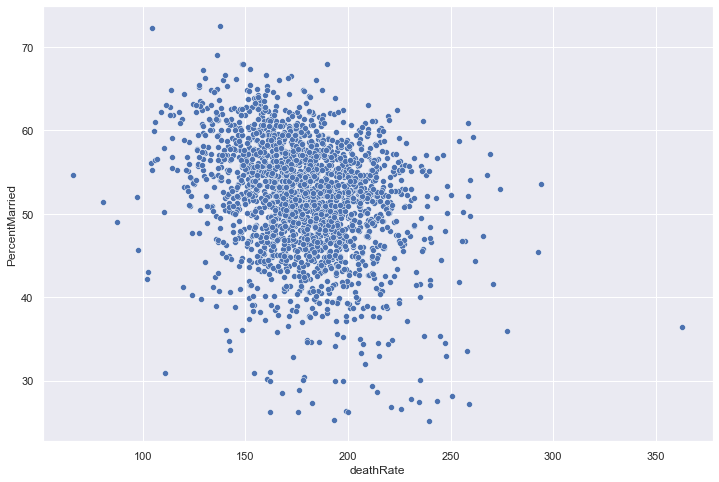

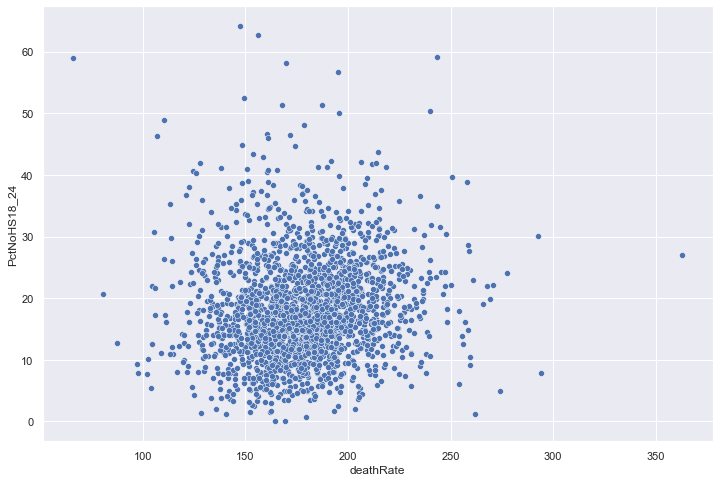

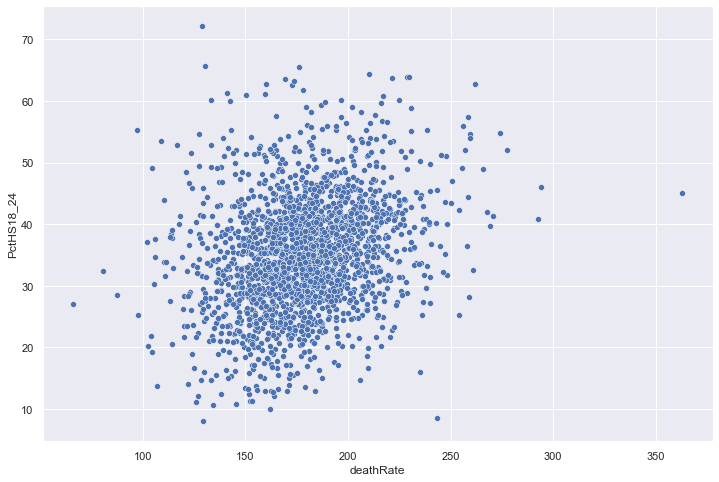

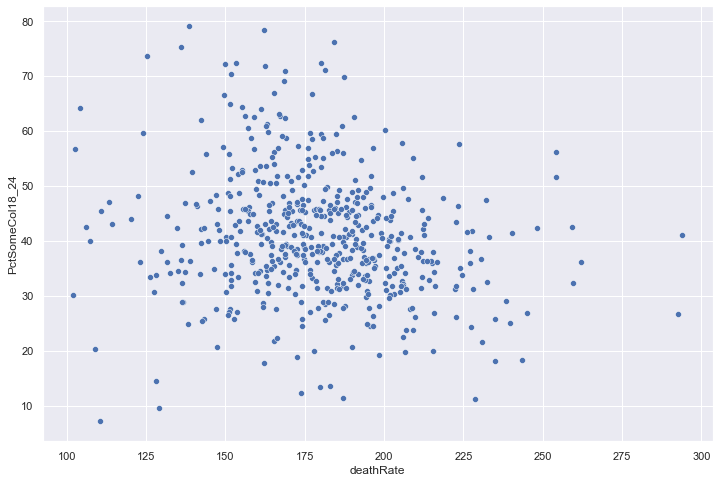

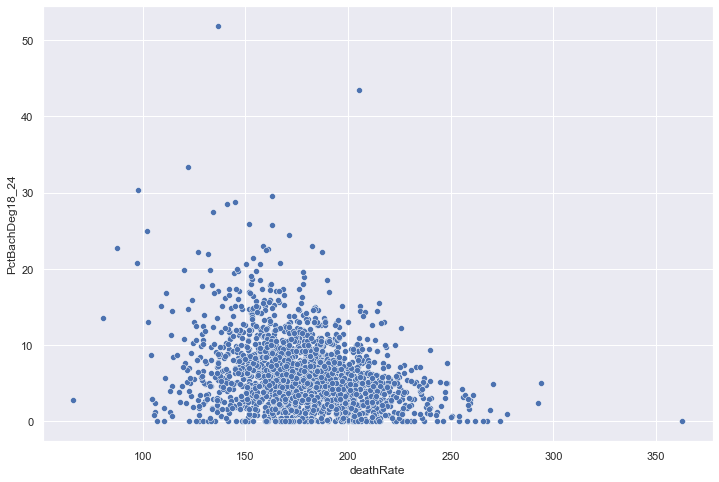

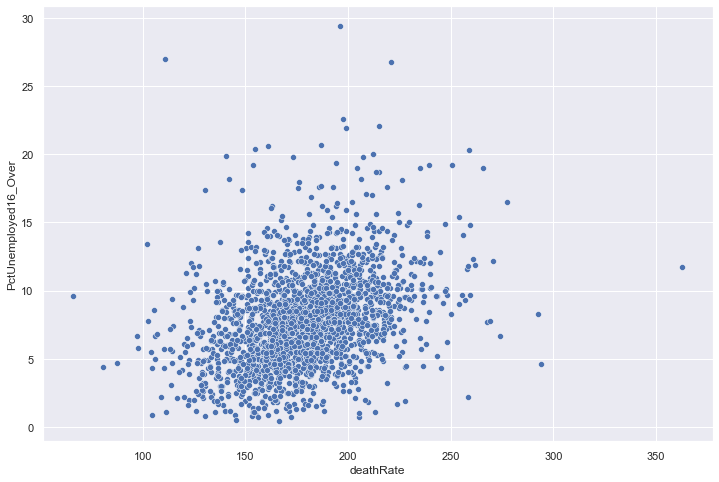

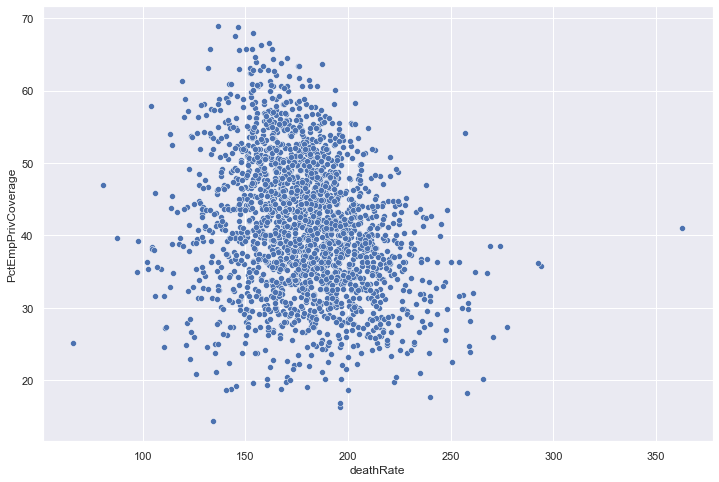

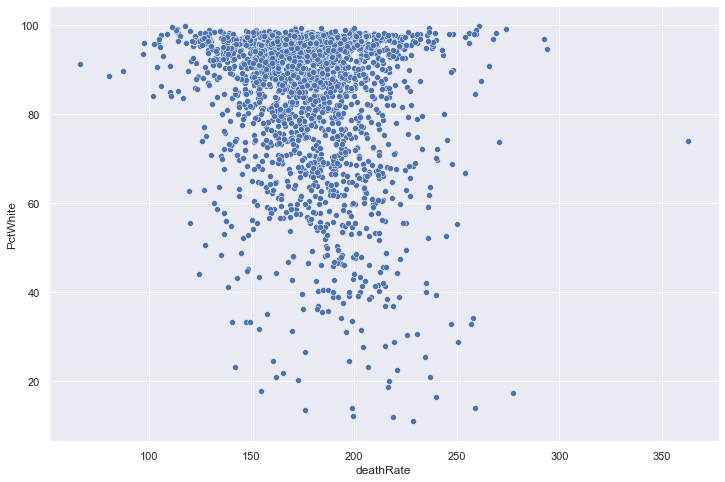

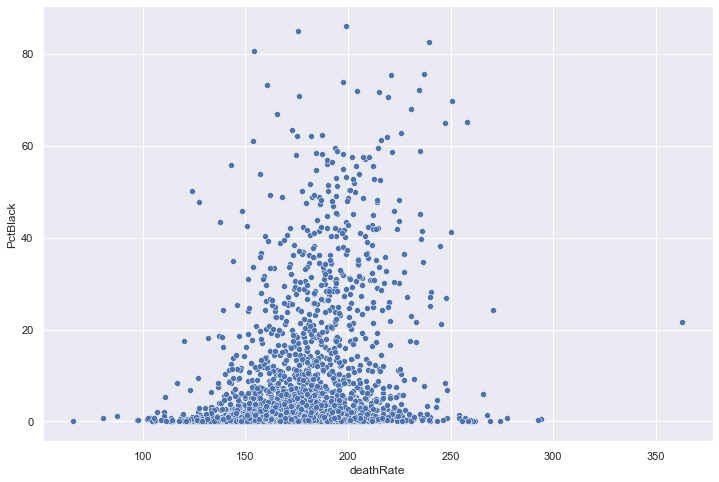

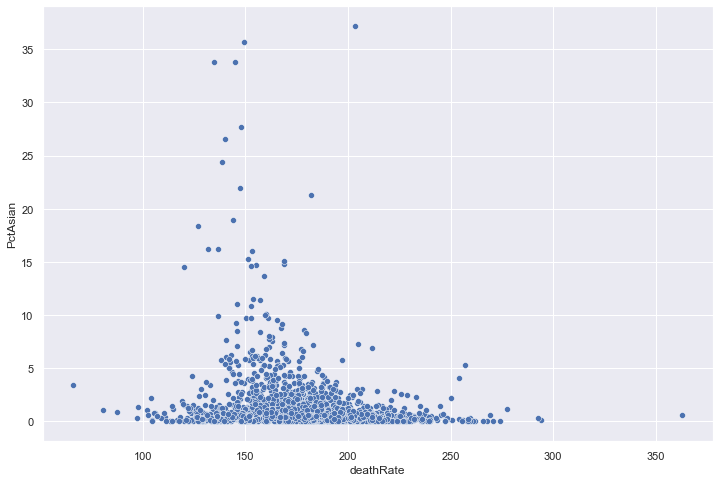

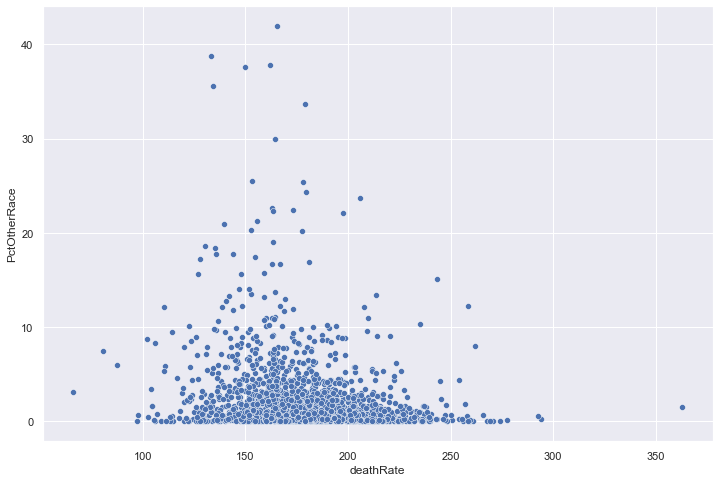

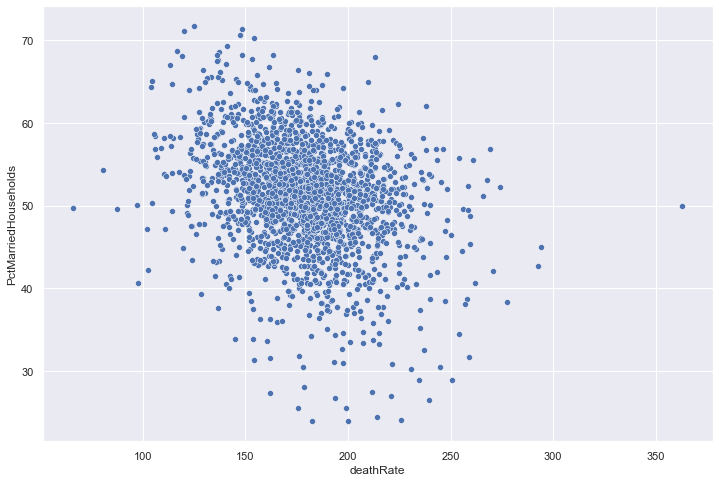

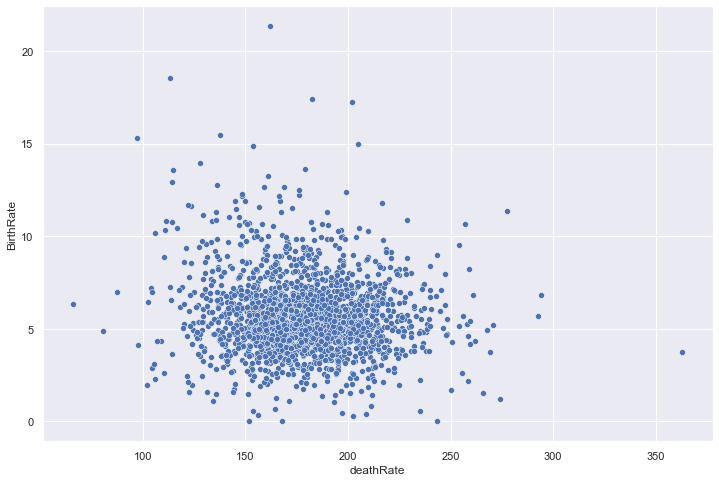

In [16]:
# Gets the columns we haven't already looked and excludes the column of county names
cols = [col for col in cancer_df.columns if col not in high_corr_col and col != 'Geography']

# Get scatter plots for all columns and the target varaible to look for non-linear relationships
for col in cols:
    sns.scatterplot(data=cancer_df, x='deathRate', y=col)
    plt.show()


In [17]:
for col in cancer_corr.columns:
    high_corr = abs(cancer_corr[col]) > 0.5
    if high_corr.sum() - 1 > 0:
        print(col+":")
        print("\tNumber of high corralations:", high_corr.sum() - 1)

avgAnnCount:
	Number of high corralations: 2
avgDeathsPerYear:
	Number of high corralations: 2
medIncome:
	Number of high corralations: 8
popEst2015:
	Number of high corralations: 3
povertyPercent:
	Number of high corralations: 13
MedianAgeMale:
	Number of high corralations: 1
MedianAgeFemale:
	Number of high corralations: 1
PercentMarried:
	Number of high corralations: 5
PctNoHS18_24:
	Number of high corralations: 1
PctHS18_24:
	Number of high corralations: 1
PctSomeCol18_24:
	Number of high corralations: 2
PctBachDeg18_24:
	Number of high corralations: 1
PctHS25_Over:
	Number of high corralations: 1
PctBachDeg25_Over:
	Number of high corralations: 10
PctEmployed16_Over:
	Number of high corralations: 9
PctUnemployed16_Over:
	Number of high corralations: 8
PctPrivateCoverage:
	Number of high corralations: 9
PctPrivateCoverageAlone:
	Number of high corralations: 9
PctEmpPrivCoverage:
	Number of high corralations: 8
PctPublicCoverage:
	Number of high corralations: 9
PctPublicCoverageAlon